# Rental bike dataset

## Data pulled from http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

### Inspired by: https://www.kaggle.com/c/bike-sharing-demand

#### Goal: Combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
day = pd.read_csv('day.csv')

In [4]:
hour = pd.read_csv('hour.csv')

In [5]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Columns description

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [10]:
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

## Exploratory Data Analysis (EDA)

In [55]:
day.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


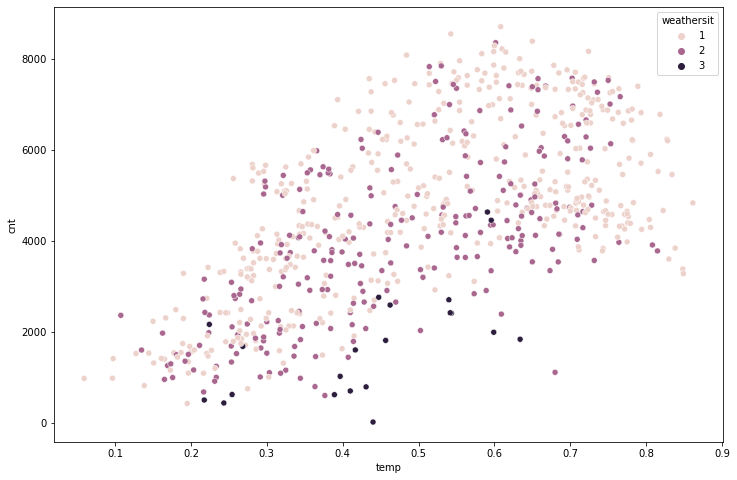

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=day,x='temp',y='cnt',hue='weathersit');

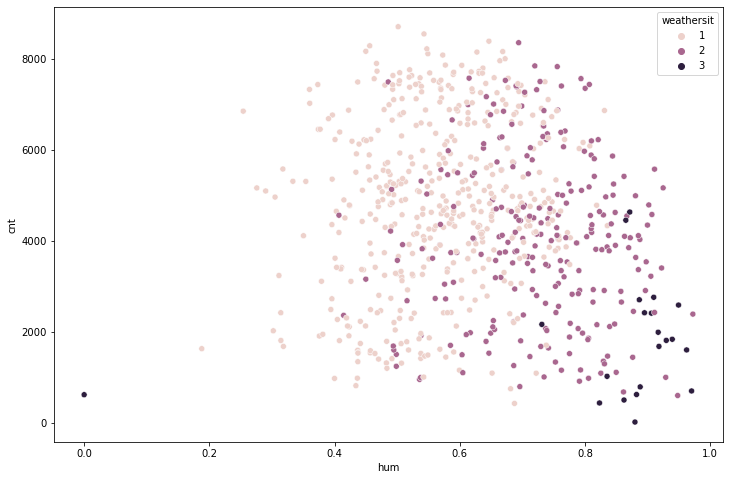

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=day,x='hum',y='cnt',hue='weathersit');

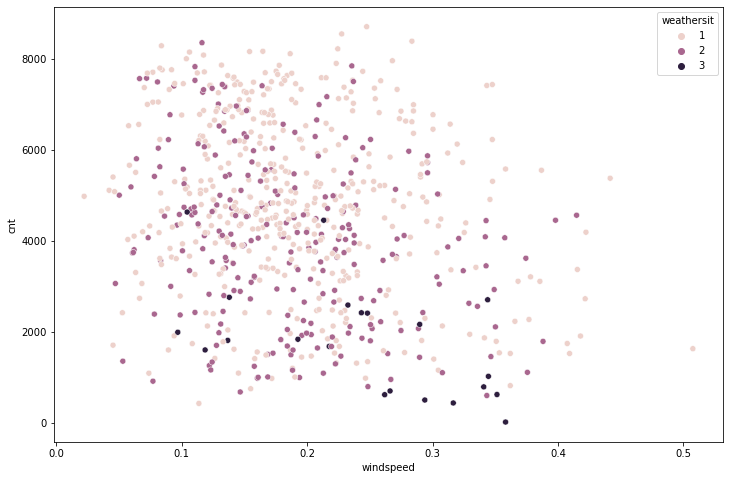

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=day,x='windspeed',y='cnt',hue='weathersit');

<AxesSubplot:xlabel='season', ylabel='cnt'>

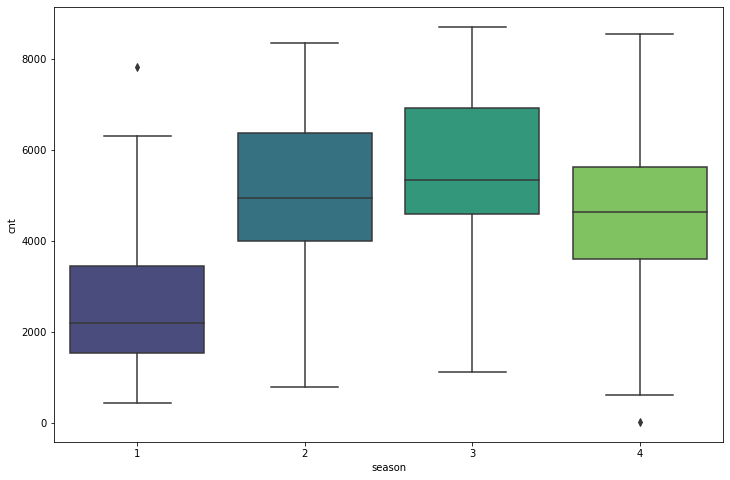

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(data=day,x='season',y='cnt',palette='viridis')

<AxesSubplot:xlabel='hr', ylabel='cnt'>

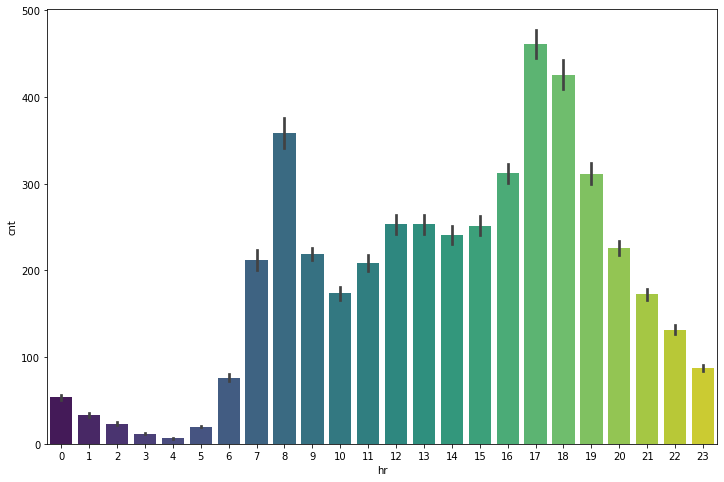

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(data=hour,x='hr',y='cnt',palette='viridis')

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

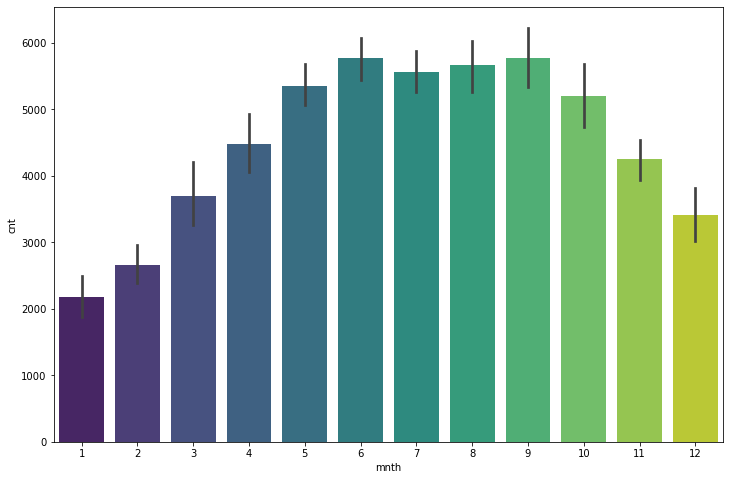

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=day,x='mnth',y='cnt',palette='viridis')

<AxesSubplot:>

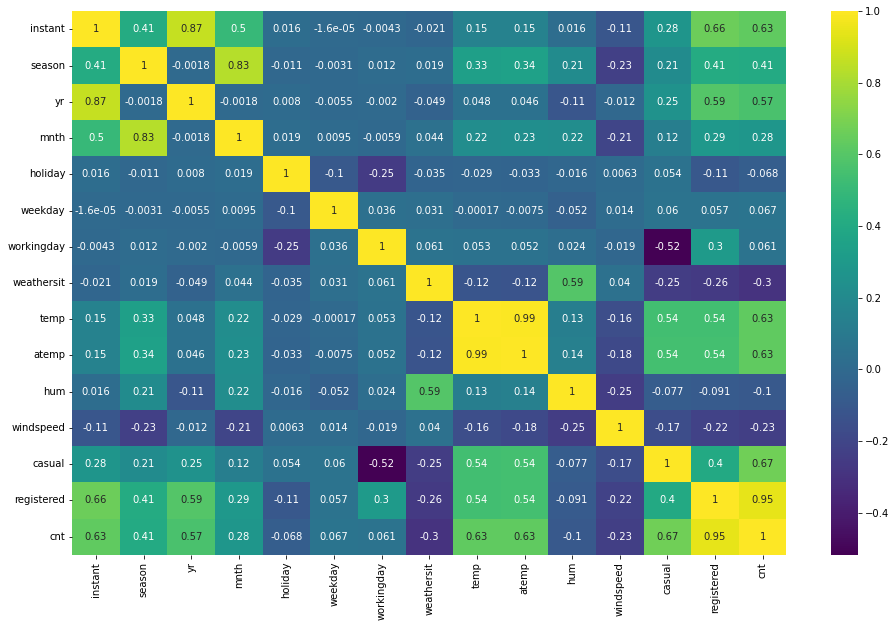

In [34]:
plt.figure(figsize=(16,10))
sns.heatmap(day.corr(),annot=True,cmap='viridis')

## Model selection

### It does not look like we need to scale the data as the data is already scaled

#### We will be using hour rather than day dataset to train our model. 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Model 1: SVM regression

In [39]:
from sklearn.svm import SVR

In [77]:
X = hour[['season', 'mnth', 'holiday', 'weekday','hr',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

In [78]:
y = hour['cnt']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### We will use GridSearchCV to find the best parameters for the SVR model

In [83]:
svr = SVR()

In [84]:
svr.fit(X_train,y_train)

SVR()

In [85]:
svr_preds = svr.predict(X_test)

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [88]:
mean_absolute_error(y_test,svr_preds)

91.56521375531473

In [89]:
np.sqrt(mean_squared_error(y_test,svr_preds))

141.9268087803914

In [91]:
142/day['cnt'].mean()

0.03152508944844001

Around 3% error rate.

### Model 2:  Random forest regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
rfr_model = RandomForestRegressor(n_estimators=150,random_state=42)

In [94]:
rfr_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [95]:
rfr_preds = rfr_model.predict(X_test)

In [96]:
mean_absolute_error(y_test,rfr_preds)

42.46648589420425

In [97]:
np.sqrt(mean_squared_error(y_test,rfr_preds))

65.43074252850549

In [99]:
65/day['cnt'].mean()

0.014430498691187328

Around 1.5% error rate. Improvement from previous model